---
- ToC
- Intro
- Methodik
- EDA + Process Model
    - Process durations (min max / avg) + metrics dom vs int 
    - -> bottleneck
    - Top 3 Traces to Process modell -> confromance check
    - rejected applications
    - unexpected behaviour

- missing details
- ML
- KPis
- process improvement
---

### Current Topics in main:

- Comparison dom vs int
- each Top 5 Variants

statistical analysis

- Head + description of column names (dom/)
- EDA (dom)
    - add: view_events_per_time-graph
- BPMN (dom)
- Process Tree (dom)
- (petri net) (dom)
- DFG (dom)

Process duration

- avg duration of whole process (dom)
- avg duration of each activity (dom)
- total durations of each activity (dom)
- unexpected behaviour : saved by employee (dom)

bottleneck (dom)

- dfg graph with durations
- insights from dfg
- insights from disco
- additonal remarks → unexpexted behaviour

rejected applications

- amount of rejection total (dom)
- amount of rejections based on role (dom)
- boxplot rejquested amount of rejected delcarations by role (dom)
- boxplot rejquested amount of approved delcarations by role (dom)
- Distribution of requested amount of rejected vs approved cases (dom)
---

# Introduction


---
# Methodology 

---
# Exploratory Data Analysis (I)

## Import

In [1]:
import pm4py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import networkx as nx


## Setup of logfiles

In [98]:
domestic_path = 'data/DomesticDeclarations.xes'
international_path = 'data/InternationalDeclarations.xes'

# log = pm4py.read_xes(domestic_path);

log_d = pm4py.read_xes(domestic_path)
log_i = pm4py.read_xes(international_path)


parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

## Description of Columns: Domestic vs. International (I)
- Dropping unneccesary / duplicate columns (?)

In [13]:
pd.set_option('display.max_columns', None)

## Comparison of Roles: Domestic vs. International (I)

## Comparison of Activities: Domestic vs. International (I)

## Comparison of Variants: Domestic vs. International (I)

## Event Count by Resource: Domestic vs. International (I)

## System Events: Domestic vs. International (I)

## Amount Destribution: Domestic vs. International (I)

## Events per Time Graph: Domestic vs. International (M)

---
# Process Model(s)

## Top 6 and Top 5 Model (M)

In [136]:
def filter_top_n_variants(log, n):  # Filters and returns df containing the top n variants of a given logfile

    df = log
    variants = pm4py.get_variants(df, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
    variants = dict(sorted(variants.items(), key=lambda item: item[1], reverse=True))  # sort dictionary by value in descending order

    top_variants = [list(variants.items())[i] for i in range(n)]
    
    valid_cases_list = []
    for variant in top_variants:
        grouped = df.groupby('case:concept:name')['concept:name'].apply(list)
        valid_cases = grouped[grouped.apply(lambda x: all(item in x for item in variant[0]) and len(x) == len(variant[0]))].index
        valid_cases_list.extend(valid_cases)
    
    filtered_df = df[df['case:concept:name'].isin(valid_cases_list)]

    return filtered_df

In [135]:
log_i_top_6 = filter_top_n_variants(log_i, 6)
log_d_top_5 = filter_top_n_variants(log_i, 5)

## Petri Net or DFG (I)

## Start + End Activities (M)



In [105]:

def return_start_activities(log):
    start_activities = pm4py.get_start_activities(
        log, 
        activity_key='concept:name', 
        case_id_key='case:concept:name', 
        timestamp_key='time:timestamp')
    
    return start_activities

def return_end_activities(log):
    end_activities = pm4py.get_end_activities(
        log, 
        activity_key='concept:name', 
        case_id_key='case:concept:name', 
        timestamp_key='time:timestamp')
    
    return end_activities

In [109]:
print(return_start_activities(log_i))
print(return_start_activities(log_d))

print(return_end_activities(log_i))
print(return_end_activities(log_d))

{'Permit SUBMITTED by EMPLOYEE': 5294, 'Start trip': 740, 'Declaration SUBMITTED by EMPLOYEE': 407, 'Declaration SAVED by EMPLOYEE': 8}
{'Declaration SUBMITTED by EMPLOYEE': 10365, 'Declaration SAVED by EMPLOYEE': 135}
{'Payment Handled': 5646, 'End trip': 593, 'Declaration REJECTED by EMPLOYEE': 130, 'Declaration SAVED by EMPLOYEE': 54, 'Declaration REJECTED by MISSING': 11, 'Permit REJECTED by MISSING': 8, 'Request Payment': 3, 'Send Reminder': 2, 'Declaration FINAL_APPROVED by SUPERVISOR': 1, 'Declaration REJECTED by SUPERVISOR': 1}
{'Payment Handled': 10043, 'Declaration REJECTED by EMPLOYEE': 284, 'Declaration SAVED by EMPLOYEE': 134, 'Declaration REJECTED by MISSING': 30, 'Declaration REJECTED by ADMINISTRATION': 5, 'Declaration REJECTED by SUPERVISOR': 4}


## Fitness (M)

## Unexpected Behaviour (only one case of...) (M)


## Recycled applications (M)

## Differences between international and domestic application (I)

---
# Specific Questions

## How long do the different process instances take? Are there any notable patterns? (M)
- Average durations of the whole process
- Average duration of each activity
- Total duration of each activity 
> (Put visualization of avg + total durations next to each other)
- Unexpected behaviour: e.g. "Saved by employee" (dom)

### Average durations of the whole process

In [99]:
def avg_duration_of_cases(log):
    case_arr_avg = pm4py.get_case_arrival_average( #Gets the average difference between the start times of two consecutive cases
        log, 
        activity_key='concept:name', 
        case_id_key='case:concept:name', 
        timestamp_key='time:timestamp')
    return case_arr_avg  

In [100]:

duration_i = avg_duration_of_cases(log_i)
duration_d = avg_duration_of_cases(log_d)

print(f"International: {duration_i / 24} hours")
print(f"Domestic: {duration_d / 24} hours")

International: 447.0025136993383 hours
Domestic: 246.65215734831887 hours


The output above shows, that the average duration of the process for international travel is 447 hours. The Domestic Travel process, on the other hand, has a duration of 247 hours. The duration from the beginning to the end of each case was taken into account, based on which an average was calculated.

### Average and Total duration of each activity

Now let's look at the duration by individual activities. These can give us first indications of possible bottlenecks.

To do this, a duration is first calculated for each entry in the logfile and appended as a new column. Here, it is assumed that the duration of an activity is the difference between the current timestamp of one activity and the timestamp of the previous activity. Therefore, the first activity of each case has no duration and gets marked as ``NaT``. However, in order to calculate only the durations within a case per activity, the data set is grouped by Case ID ```('case:concept:name')``` beforehand. We want to make sure that the activities of each case are presented in the correct order, so we sort secondarily by timestamp ```('time:timestamp')```. We have applied this to both data sets. The first 5 lines of each output can be seen as follows:

In [18]:
log_i = log_i.sort_values(['case:concept:name', 'time:timestamp'])
log_i['duration'] = log_i.groupby('case:concept:name')['time:timestamp'].diff()  # difference of one timestamp to next between two activities of one case
log_i[:5]

,id,org:resource,concept:name,time:timestamp,org:role,case:Permit travel permit number,case:DeclarationNumber,case:Amount,case:RequestedAmount,case:Permit TaskNumber,case:Permit BudgetNumber,case:OriginalAmount,case:Permit ProjectNumber,case:concept:name,case:Permit OrganizationalEntity,case:travel permit number,case:Permit RequestedBudget,case:id,case:Permit ID,case:Permit id,case:BudgetNumber,case:Permit ActivityNumber,case:AdjustedAmount,duration
27174,st_step 1004_0,STAFF MEMBER,Permit SUBMITTED by EMPLOYEE,2018-03-01 09:55:17+00:00,EMPLOYEE,travel permit number 993,declaration number 1003,361.39224,361.39224,UNKNOWN,budget 994,361.39224,UNKNOWN,declaration 1002,organizational unit 65460,travel permit number 993,1273.252058,declaration 1002,travel permit 992,travel permit 992,budget 146827,activity 995,361.39224,NaT
27175,st_step 1005_0,STAFF MEMBER,Permit APPROVED by ADMINISTRATION,2018-03-01 09:55:21+00:00,ADMINISTRATION,travel permit number 993,declaration number 1003,361.39224,361.39224,UNKNOWN,budget 994,361.39224,UNKNOWN,declaration 1002,organizational unit 65460,travel permit number 993,1273.252058,declaration 1002,travel permit 992,travel permit 992,budget 146827,activity 995,361.39224,0 days 00:00:04
27176,st_step 1006_0,STAFF MEMBER,Permit FINAL_APPROVED by SUPERVISOR,2018-03-01 14:01:48+00:00,SUPERVISOR,travel permit number 993,declaration number 1003,361.39224,361.39224,UNKNOWN,budget 994,361.39224,UNKNOWN,declaration 1002,organizational unit 65460,travel permit number 993,1273.252058,declaration 1002,travel permit 992,travel permit 992,budget 146827,activity 995,361.39224,0 days 04:06:27
27177,rv_travel permit 992_6,STAFF MEMBER,Start trip,2018-03-18 23:00:00+00:00,EMPLOYEE,travel permit number 993,declaration number 1003,361.39224,361.39224,UNKNOWN,budget 994,361.39224,UNKNOWN,declaration 1002,organizational unit 65460,travel permit number 993,1273.252058,declaration 1002,travel permit 992,travel permit 992,budget 146827,activity 995,361.39224,17 days 08:58:12
27178,rv_travel permit 992_7,STAFF MEMBER,End trip,2018-03-22 23:00:00+00:00,EMPLOYEE,travel permit number 993,declaration number 1003,361.39224,361.39224,UNKNOWN,budget 994,361.39224,UNKNOWN,declaration 1002,organizational unit 65460,travel permit number 993,1273.252058,declaration 1002,travel permit 992,travel permit 992,budget 146827,activity 995,361.39224,4 days 00:00:00


In [17]:
log_d = log_d.sort_values(['case:concept:name', 'time:timestamp'])
log_d['duration'] = log_d.groupby('case:concept:name')['time:timestamp'].diff()  # difference of one timestamp to next between two activities of one case
log_d[:5]

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount,duration
12788,st_step 100004_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-01-30 08:20:07+00:00,EMPLOYEE,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,NaT
12789,st_step 100003_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2018-02-07 08:58:46+00:00,ADMINISTRATION,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,8 days 00:38:39
12790,st_step 100002_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2018-02-08 09:59:05+00:00,SUPERVISOR,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,1 days 01:00:19
12791,dd_declaration 100000_19,SYSTEM,Request Payment,2018-02-09 11:42:49+00:00,UNDEFINED,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,1 days 01:43:44
12792,dd_declaration 100000_20,SYSTEM,Payment Handled,2018-02-12 16:31:20+00:00,UNDEFINED,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,3 days 04:48:31


Now we can group the data set by activity ```('concept:name')```. Here the average duration is calculated using the ``mean()`` function.

In [44]:
def get_average_duration_per_activity(log):
    average_durations = log.groupby('concept:name')['duration'].mean()
    average_durations = average_durations.sort_values(ascending=False)
    return average_durations

Because we want to take into account not only the average duration, but also the total duration, we use ```sum()``` to sum up the duration per activity in a separate function.

In [45]:
def get_total_duration_per_activity(log):
    total_durations = log.groupby('concept:name')['duration'].sum()
    total_durations = total_durations.sort_values(ascending=False)
    return total_durations

In [78]:
def visualize_durations(log):

    average_durations = get_average_duration_per_activity(log)
    average_durations_hours = average_durations.dt.total_seconds() / 3600 # Conversion to hours

    total_durations = get_total_duration_per_activity(log)
    total_durations_days = total_durations.dt.total_seconds() / 3600 / 24 # Conversions to hours
    

    plt.figure(figsize=(24, 30))

    plt.subplot(2, 1, 1)

    sns.barplot(x=average_durations_hours.values, y=average_durations_hours.index, palette="viridis")

    plt.ylabel('Activity')
    plt.xlabel('Average Duration (hours)')
    plt.title('Average Duration for Each Activity in Hours')

    for i, value in enumerate(average_durations_hours.values):  # Display values next to the bars
        plt.text(value + 0.01 * value, i + 0.11, f"{value:.2f}", fontsize=14)

    plt.subplot(2, 1, 2)

    sns.barplot(x=total_durations_days.values, y=total_durations_days.index, palette="viridis")

    plt.ylabel('Activity')
    plt.xlabel('Total Duration (days)')
    plt.title('Total Duration for Each Activity in Days')

    for i, value in enumerate(total_durations_days.values):  # Display values next to the bars
        plt.text(value + 0.01 * value, i + 0.11, f"{value:.2f}", fontsize=14)

    plt.show();

posx and posy should be finite values
posx and posy should be finite values


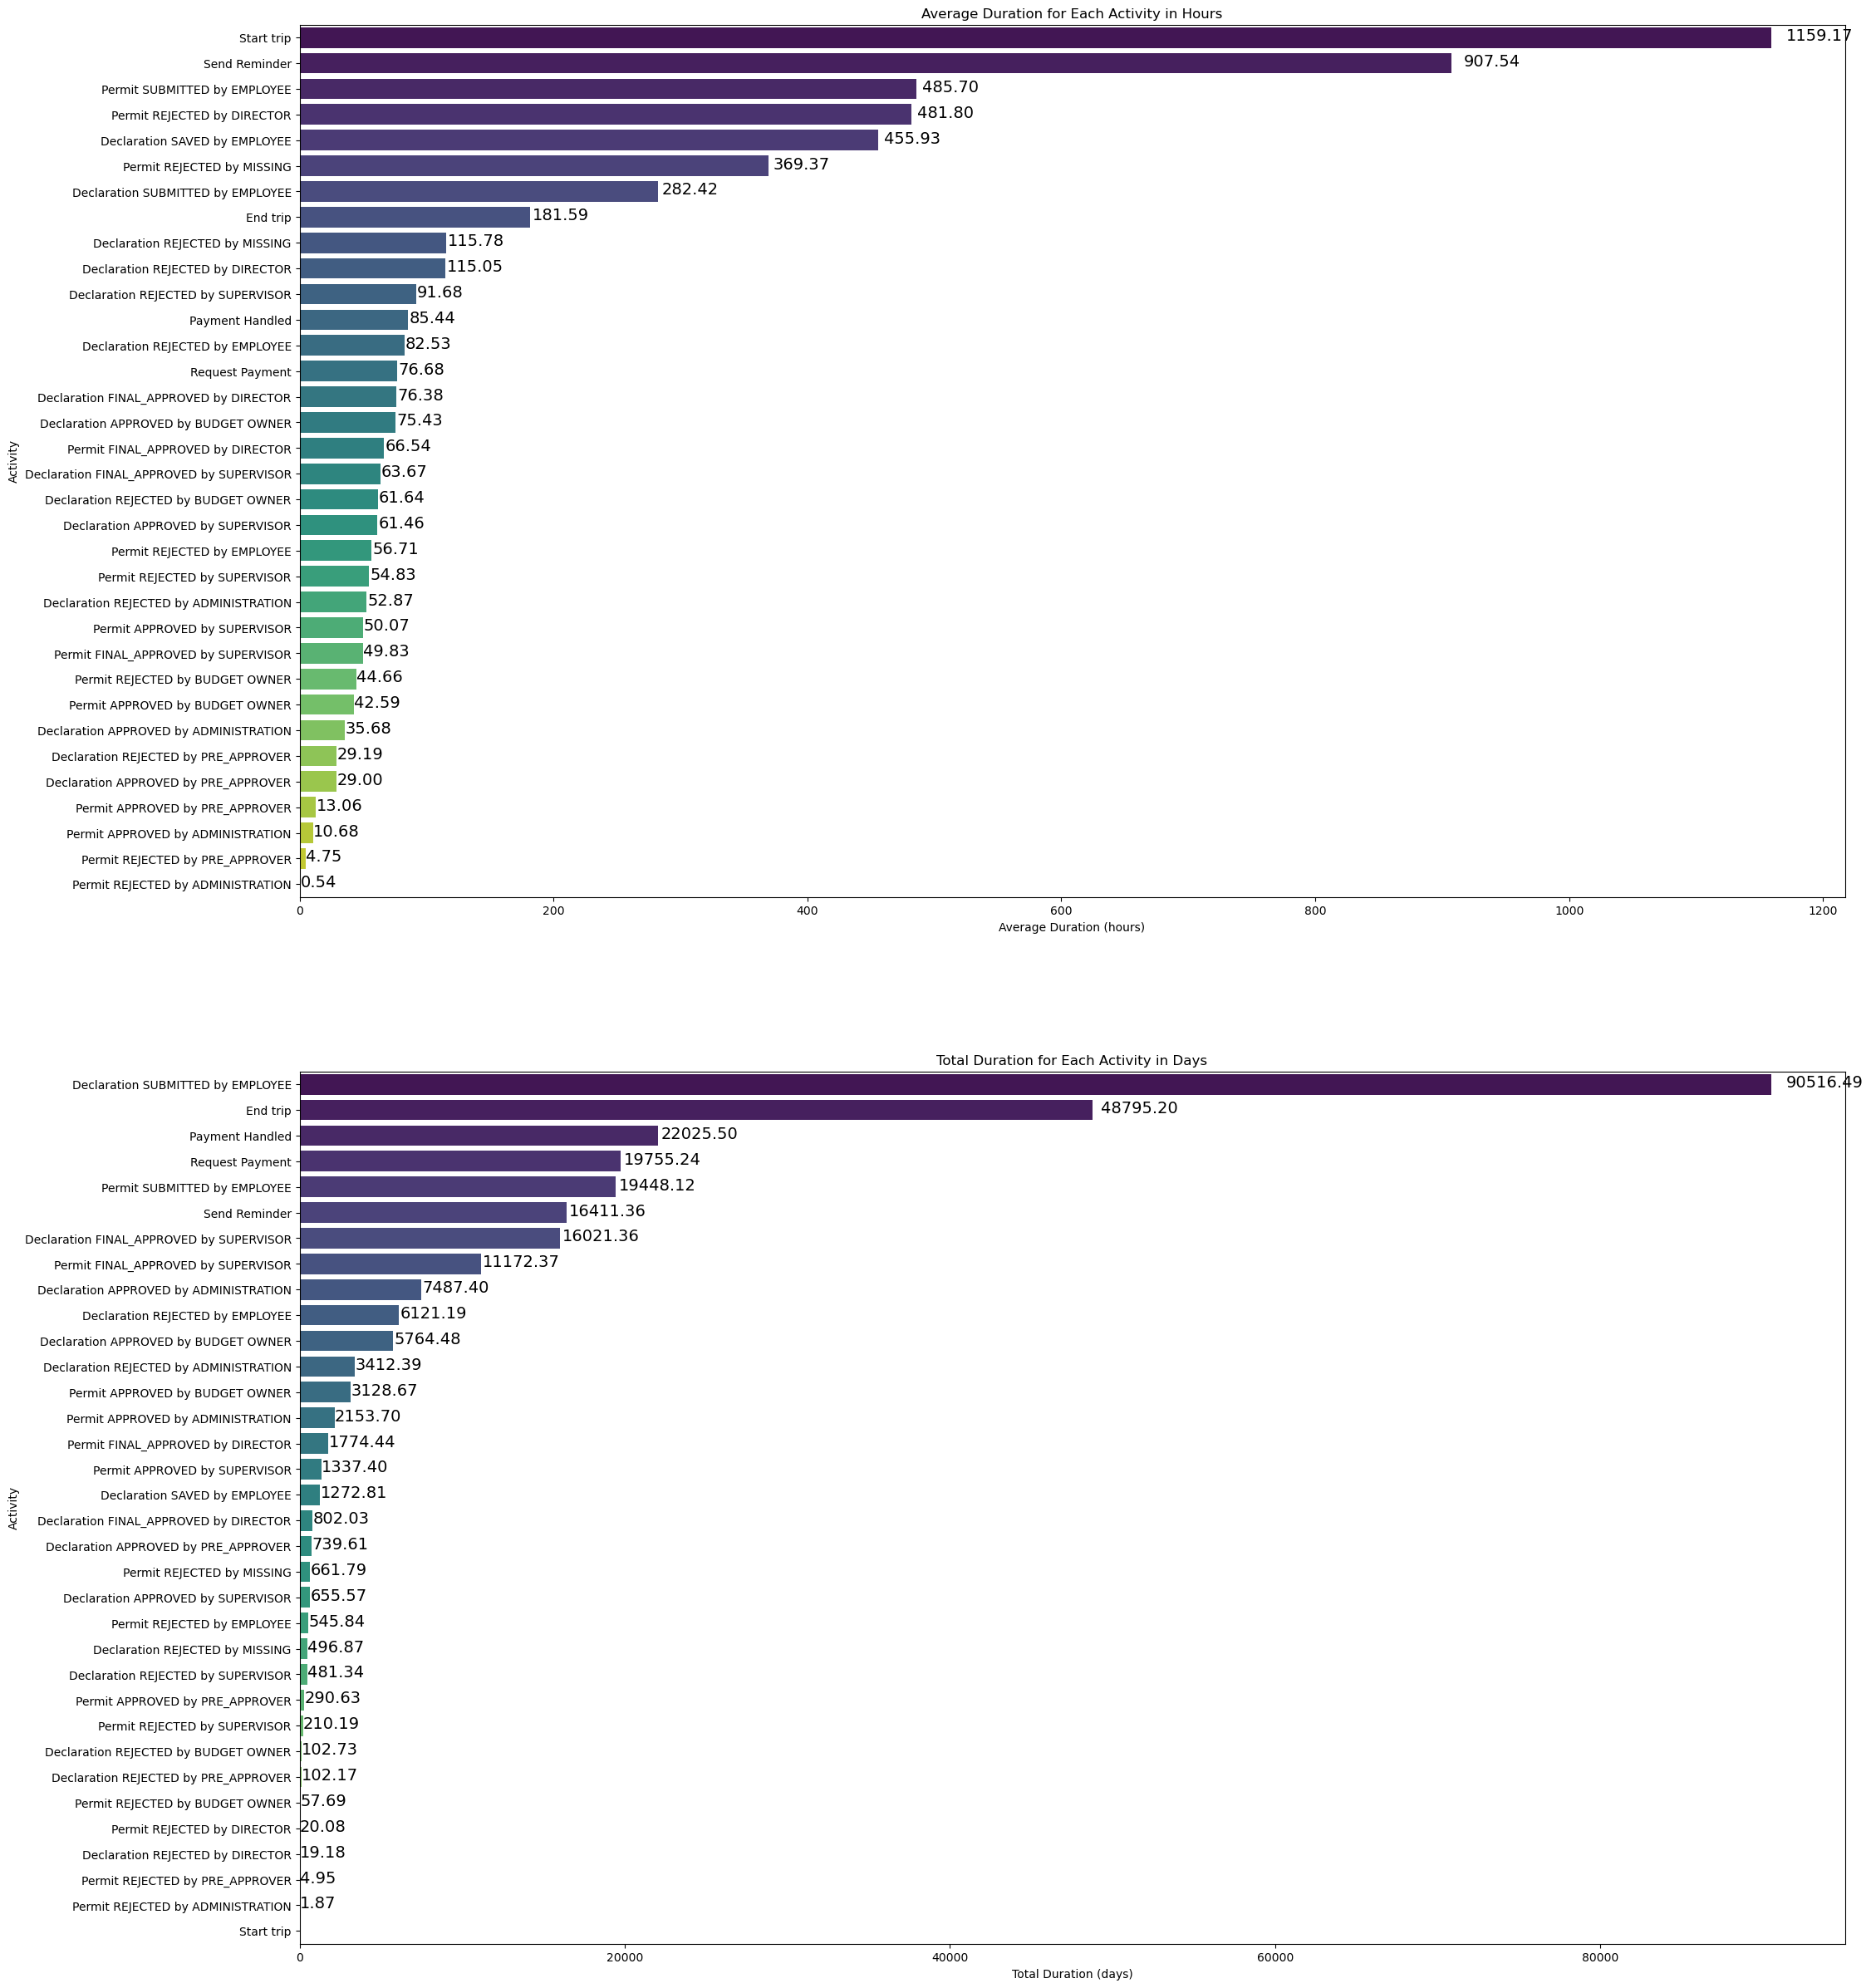

In [79]:
visualize_durations(log_i)

As shown in the graph above, two barplots are shown for the Average Duration for each Activity and the Total duration for each Activity. This one was generated based on the data set ``(log_i)`` for international travel.

posx and posy should be finite values
posx and posy should be finite values


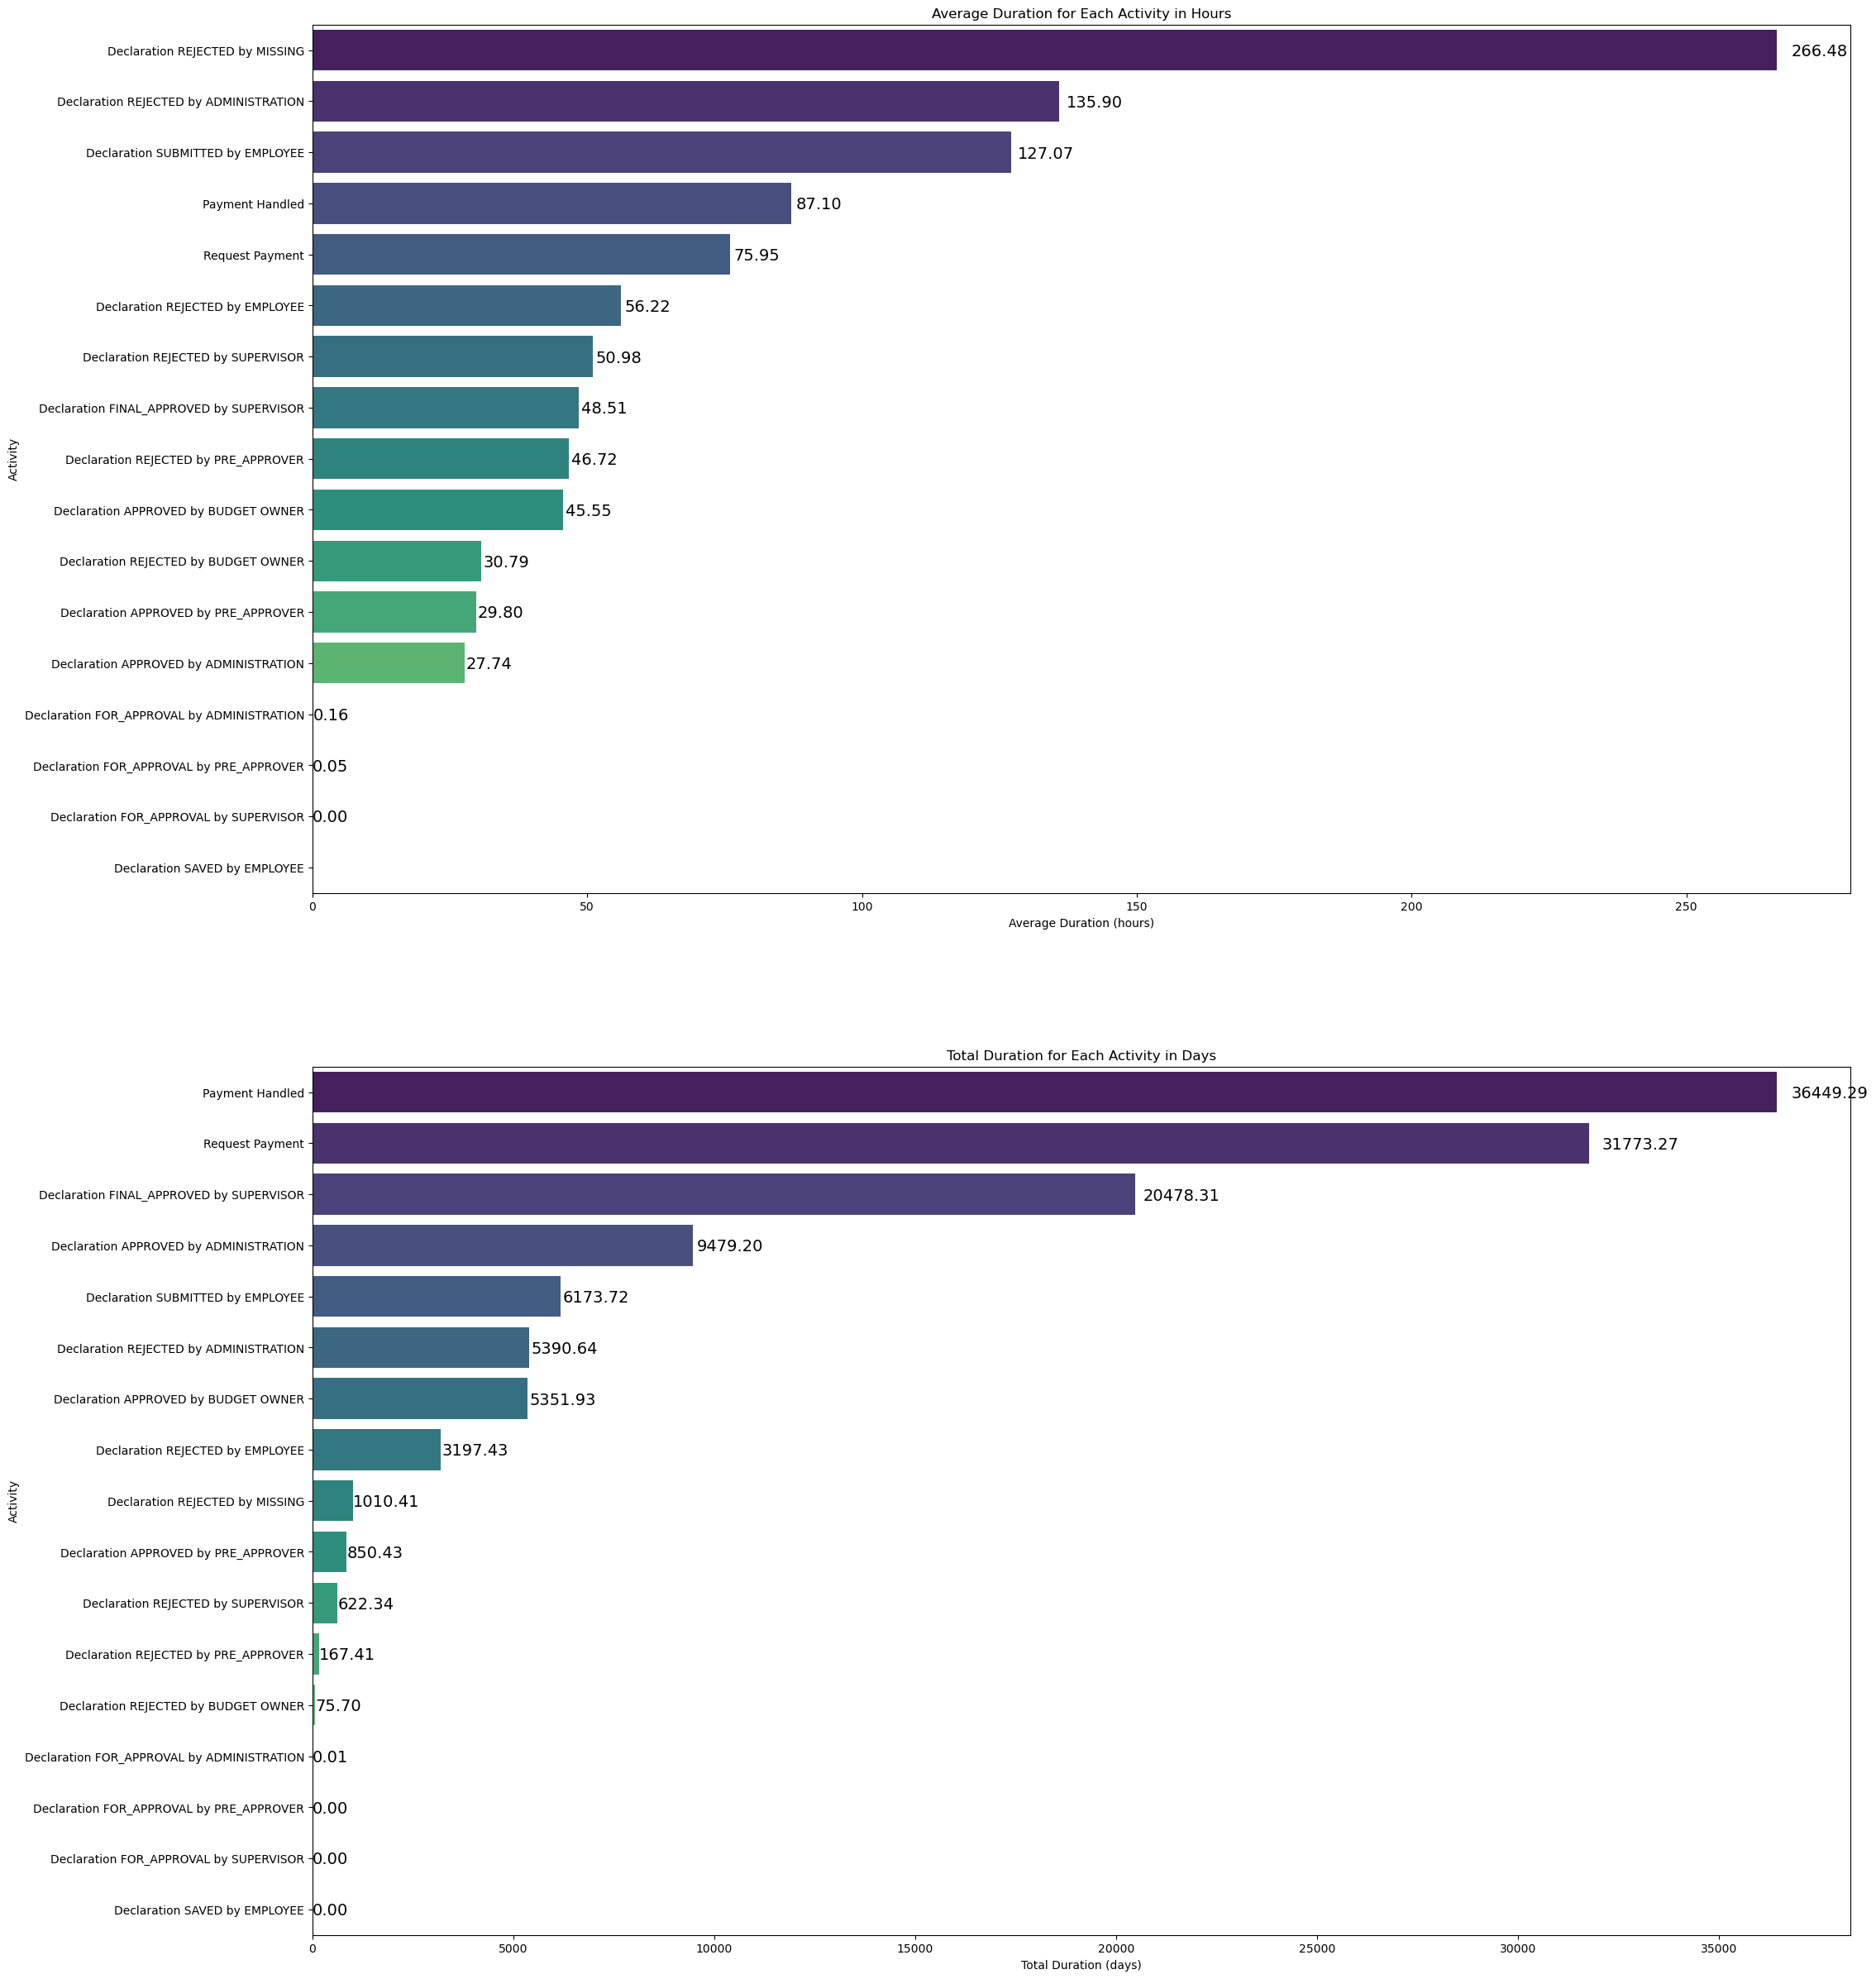

In [80]:
visualize_durations(log_d)

### Average Duration - Domestic
At first glance you can recognise, that ``"Declaration REJECTED by MISSING"`` has the highest average duration with a value of 266 hours. ``"Declaration y ADMINISTRATION"`` follows with 136 hours.
### Total Duration - Domestic
A glance at the chart for total duration offers new insights. The most time consuming activities are the those handled by the resource ``"SYSTEM"``, which are ``"Request Payment"`` and ``"Payment Handled"``. ``"FINAL_APPROVED by SUPERVISOR"`` seems to be time consuming activity. As the starting activity of most cases the value for ``"SUBMITTED by EMPLOYEE"`` usually should be ``NaT`` or ``0``. But in this diagramm the total duration for ``"SUBMITTED by EMPLOYEE"`` represents the durations of those recycled declrations coming back from rejected declarations. 

In [92]:
def show_scatterplot_of_durations(log):

    log["duration_hours"] = log["duration"].dt.total_seconds() / 3600

    plt.figure(figsize=(24, 12))
    sns.scatterplot(x="duration_hours", y="concept:name", data=log, palette="viridis")
    plt.xlabel('Duration (hours)')
    plt.ylabel('Role')
    plt.title('Scatterplot of duration for Each Activity in hours')

    plt.xticks(rotation=45, ha='center',ticks=range(0, int(18000)+100, 500))
    plt.grid(True);

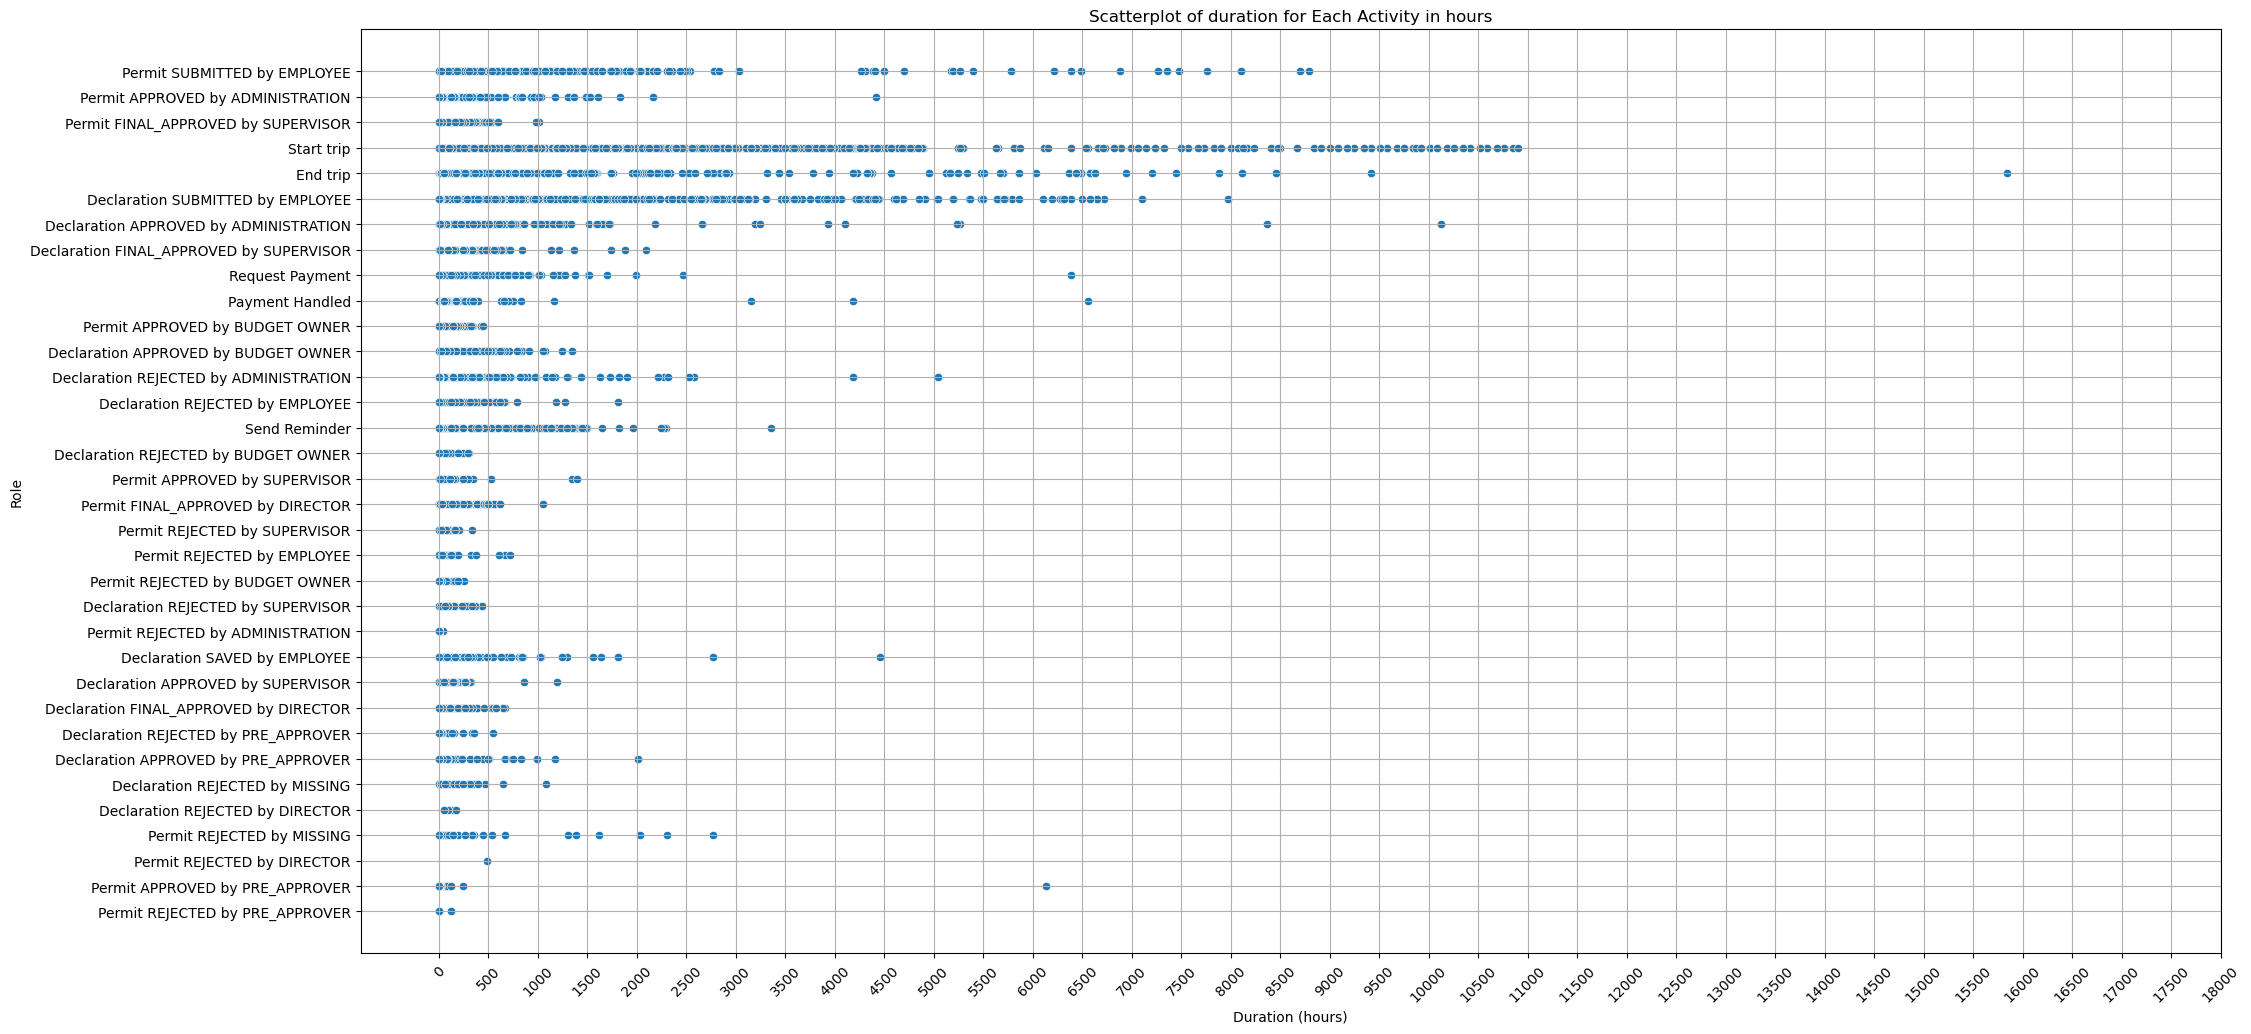

In [93]:
show_scatterplot_of_durations(log_i)

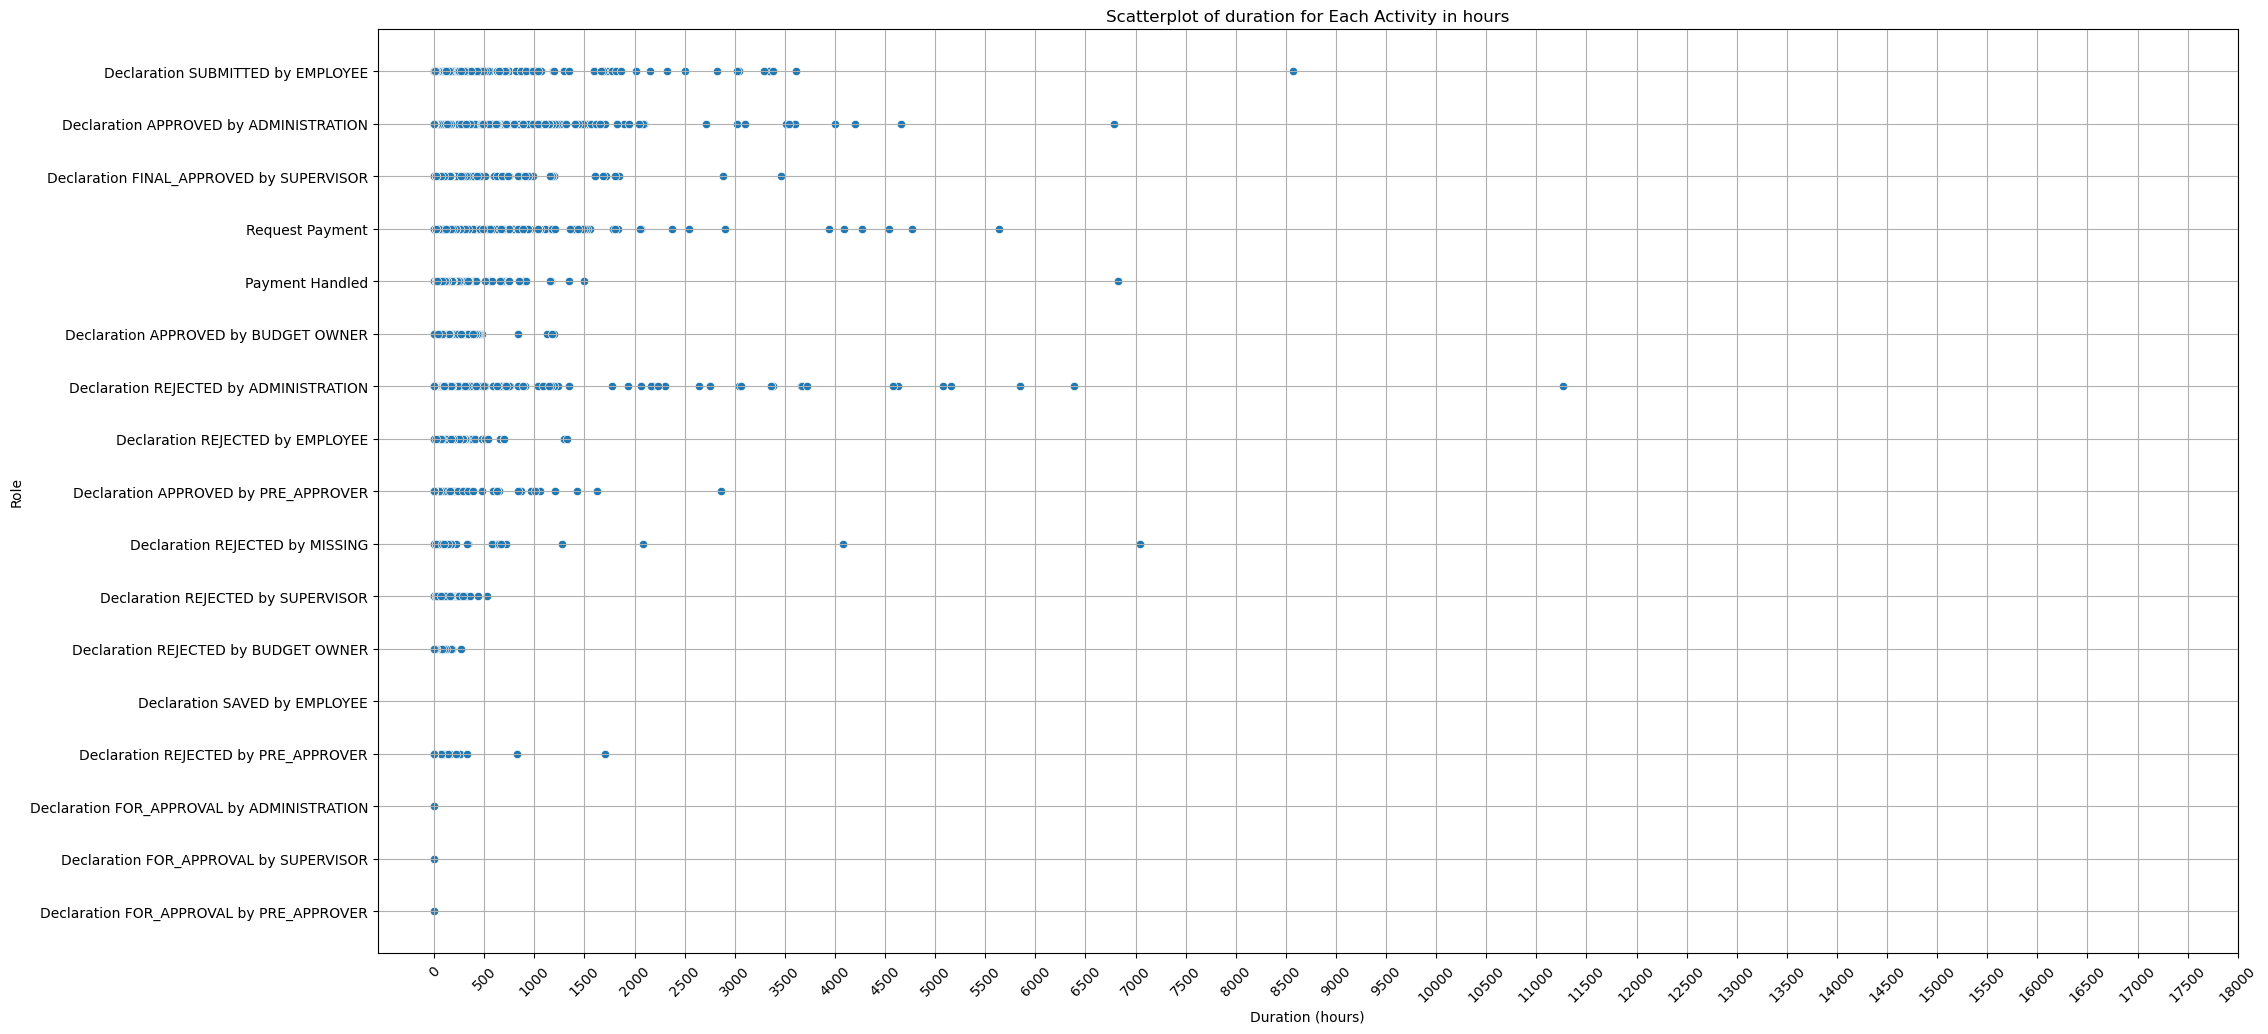

In [94]:
show_scatterplot_of_durations(log_d)

## Are there any bottlenecks? If yes, where? If yes, can you think of any reasons? (M)
- dfg graph with durations
- insights from dfg
- insight from diso

## How many applications get rejected? Can you find any reasons? (M)
- amount of rejection total
- amount of rejections based on role
- boxplot rejquested amount of rejected delcarations by role
- boxplot rejquested amount of approved delcarations by role
- Distribution of requested amount of rejected vs approved cases

### Amount of rejections
First we take a look at the total total amount of rejections. Here we filter those activities containing ``'REJECTED'``. The filtered data set cotains now rejections by certain role and ```'REJECTED by EMPLOYEE'```. However, most rejections of a certain role lead to the activity ``'REJECTED by EMPLOYEE'``. Therefore, it is sufficient for the time being to filter for all activities that contain ``'REJECTED by EMPLOYEE'``. The output of the amount of rejected application of each data set can be seen below.

In [120]:

log_i_r = log_i[log_i["concept:name"].str.contains('REJECTED by EMPLOYEE')]  # Includes Rejections of Permits
log_d_r = log_d[log_d["concept:name"].str.contains('REJECTED by EMPLOYEE')]


len_log_i_r = len(log_i_r)
len_log_d_r = len(log_d_r)
len_unique_case_i = len(log_i['case:concept:name'].unique())
len_unique_case_d = len(log_d['case:concept:name'].unique())


print(f"Amount of rejected applications for international travel: {len_log_i_r}")
print(f"Amount of rejected applications for domestic travel: {len_log_d_r}")
print("-"*75)
print(f"Amount of unique cases for international travel: {len_unique_case_i}")
print(f"Amount of unique cases for domestic travel: {len_unique_case_d}")
print("-"*75)
print(f"Rejection rate for for international travel: {(len_log_i_r/len_unique_case_i)*100}%")
print(f"Rejection rate for for domestic travel: {(len_log_d_r/len_unique_case_d)*100}%")

Amount of rejected applications for international travel: 2011
Amount of rejected applications for domestic travel: 1365
---------------------------------------------------------------------------
Amount of unique cases for international travel: 6449
Amount of unique cases for domestic travel: 10500
---------------------------------------------------------------------------
Rejection rate for for international travel: 31.183129167312764%
Rejection rate for for domestic travel: 13.0%


On the one hand, for international travel, there were a total of ``2011`` applications that did not receive approval. The data set for international travel has ``6449`` unique cases. From this pool, the rejection rate was about ``31.18%``, indicating that nearly one-third of the individuals who sought to travel internationally encountered rejection.

On the other hand, for domestic travel, ``1365`` applications were not approved. In contast to international travel the unique cases for domestic travel, amounts to ``10500``. This could be a sign of a greater demand or inclination to travel within the country. Even with the larger number of unique cases, the rejection rate for domestic travel was significantly lower than its international counterpart, standing at ``13%``.

The contrasting rejection rates could be due to more stringent regulations associated with international travel, the intricacies of documentation requirements, or the sheer volume of applicants.

### Amount of rejections based on role

In [125]:
def visualize_amount_of_rejections_by_role(log_r):

    ax = sns.countplot(x='org:role', data=log_r, palette='viridis')
    ax.set(title='Amount of Rejections by Role', xlabel='', ylabel='')
    plt.xticks(rotation=45, ha='right')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline')  # centering text

In [126]:
log_i_r = log_i[log_i["concept:name"].str.contains('REJECTED')]  # Contains all activities with "REJECTED" in its name, including "REJECTED by EMPLOYEE"
log_d_r = log_d[log_d["concept:name"].str.contains('REJECTED')]

log_i_r = log_i_r[log_i_r['org:role'] != 'EMPLOYEE']   # Filtering out the EMPLOYEE role because most rejected declartions by a certain role are getting followed up by the activity "REJECTED by EMPLOYEE"
log_d_r = log_d_r[log_d_r['org:role'] != 'EMPLOYEE'] 

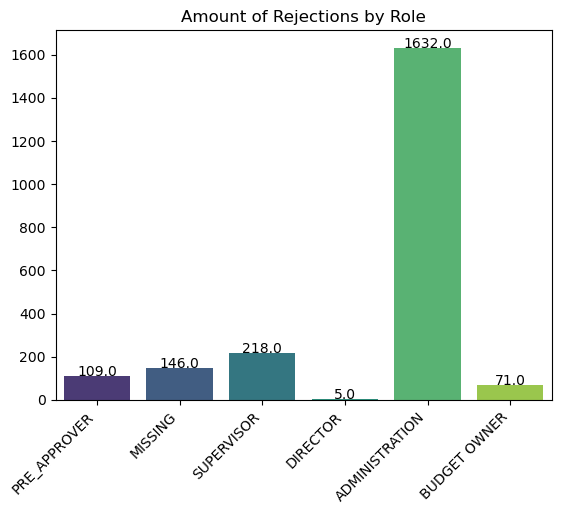

In [127]:
visualize_amount_of_rejections_by_role(log_i_r)

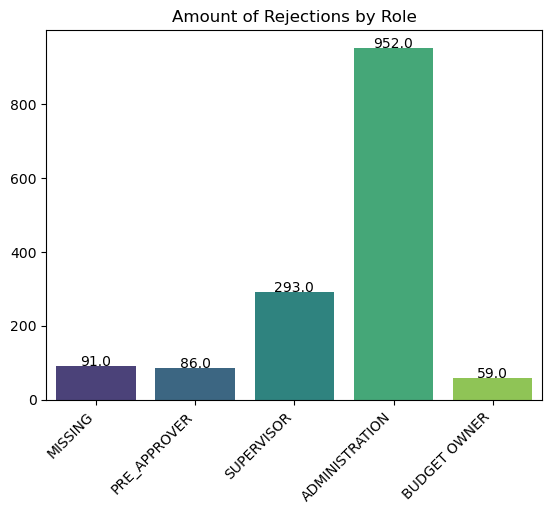

In [128]:
visualize_amount_of_rejections_by_role(log_d_r)

- boxplot rejquested amount of rejected delcarations by role
- boxplot rejquested amount of approved delcarations by role

## Are there any patterns that would suggest non-conformance?
- TBD

## Social Network / Handover Network
- TBD

---
## What is missing to provide more detailed insights into the processes?
- TBD

## Reflect on where supervised / unsupervised machine learning techniques could help to obtain further insights.
- TBD

## Can you think of useful KPIs for the processes?
- TBD

## Make specific recommendations for improving the processes.
- TBD

---
# Conclusion